In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


In [5]:
from google.colab import files
import pandas as pd
import io

print("STEP 1: Click the 'Choose Files' button that appears to upload heart.csv.")
uploaded = files.upload()

fn = list(uploaded.keys())[0]
print("Loaded file:", fn)

df = pd.read_csv(io.BytesIO(uploaded[fn]))
print("\n===== FIRST 5 ROWS (df.head()) =====")
display(df.head())

print("\n===== DATAFRAME INFO (df.info()) =====")
print(df.info())


STEP 1: Click the 'Choose Files' button that appears to upload heart.csv.


Saving heart.csv to heart (2).csv
Loaded file: heart (2).csv

===== FIRST 5 ROWS (df.head()) =====


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



===== DATAFRAME INFO (df.info()) =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [6]:
print("Missing values per column:")
print(df.isna().sum())

pct_disease = df['target'].mean() * 100
print(f"\nPercentage of records with heart disease (target==1): {pct_disease:.2f}%")


Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Percentage of records with heart disease (target==1): 51.32%


In [7]:
print("Missing values:\n", df.isna().sum())
print("\nDuplicate rows:", df.duplicated().sum())

df = df.drop_duplicates()

print("\nSummary statistics:")
display(df.describe())

for col in ['age', 'chol', 'trestbps', 'thalach']:
    bad = df[df[col] <= 0]
    if len(bad) > 0:
        print(f"Column {col} has invalid values!")


Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Duplicate rows: 723

Summary statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
sex_counts = df['sex'].value_counts(normalize=True) * 100
print("\nSex distribution (%):")
print(sex_counts)

print("\nChest Pain Type distribution:")
print(df['cp'].value_counts())

print("\nCorrelation with 'target':")
print(df.corr()['target'].sort_values(ascending=False))



Sex distribution (%):
sex
1    68.211921
0    31.788079
Name: proportion, dtype: float64

Chest Pain Type distribution:
cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64

Correlation with 'target':
target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64


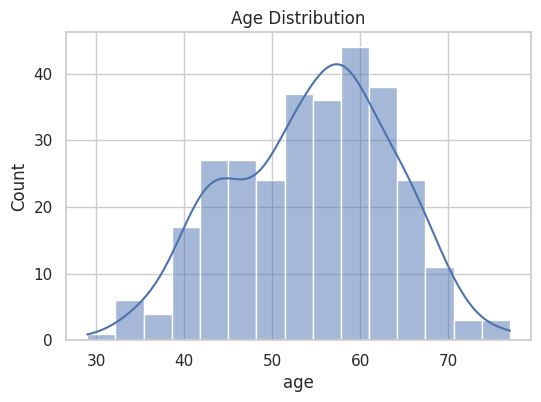

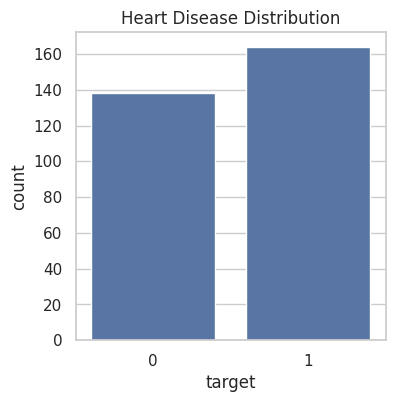

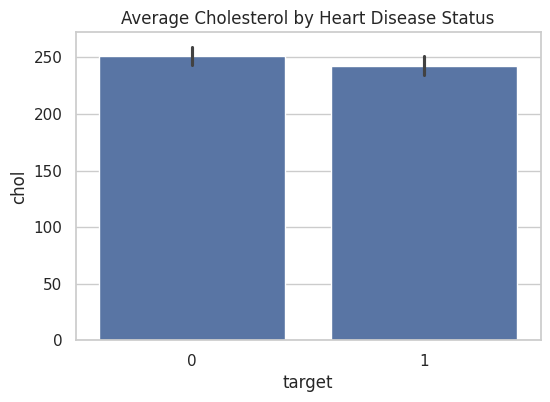

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=15, kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(4,4))
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='target', y='chol', data=df)
plt.title("Average Cholesterol by Heart Disease Status")
plt.show()


In [10]:
df['estimated_cost'] = df['target'].apply(lambda x: 20000 if x==1 else 5000)
avg_cost = df['estimated_cost'].mean()
print(f"Estimated average patient cost: ${avg_cost:,.2f}")


Estimated average patient cost: $13,145.70


In [11]:
df = pd.read_csv('heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
X = df.drop('target', axis=1)
y = df['target']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [14]:
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 820
Testing samples: 205


In [15]:
print("Percentage of people with heart disease:", y.mean()*100)


Percentage of people with heart disease: 51.31707317073171


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib


In [17]:
logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [18]:
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:,1]


In [19]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)


Accuracy: 0.8146341463414634
Precision: 0.7637795275590551
Recall: 0.9238095238095239
F1 Score: 0.8362068965517241
Confusion Matrix:
 [[70 30]
 [ 8 97]]


In [20]:
coeff_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": logreg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coeff_df)


     Feature  Coefficient
2         cp     0.844776
10     slope     0.563922
6    restecg     0.302432
7    thalach     0.018761
4       chol    -0.005208
0        age    -0.011642
3   trestbps    -0.020254
5        fbs    -0.049810
9    oldpeak    -0.527378
11        ca    -0.726152
12      thal    -0.819558
8      exang    -1.032491
1        sex    -1.604382


In [21]:
joblib.dump(logreg, 'logreg_model.pkl')


['logreg_model.pkl']

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [23]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [24]:
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:,1]


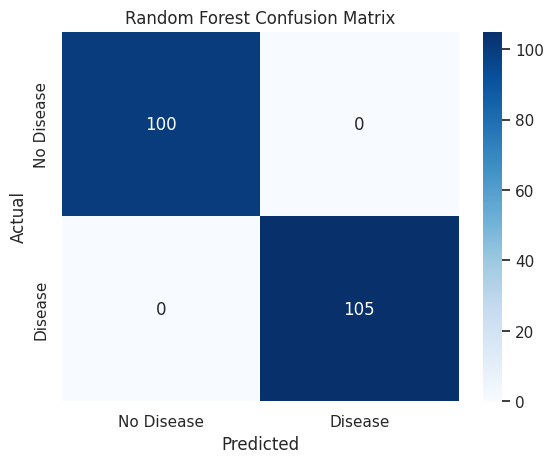

Random Forest Classification Report:
              precision    recall  f1-score   support

  No Disease       1.00      1.00      1.00       100
     Disease       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [25]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease','Disease'], yticklabels=['No Disease','Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No Disease','Disease']))


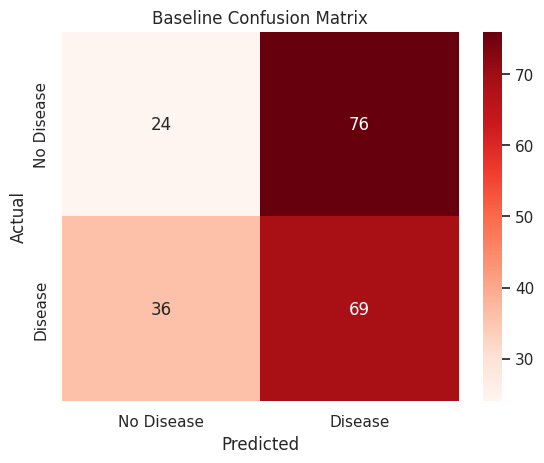

Baseline Classification Report:
              precision    recall  f1-score   support

  No Disease       0.40      0.24      0.30       100
     Disease       0.48      0.66      0.55       105

    accuracy                           0.45       205
   macro avg       0.44      0.45      0.43       205
weighted avg       0.44      0.45      0.43       205



In [26]:
y_baseline = ((X_test['age'] > 55) | (X_test['chol'] > 240)).astype(int)

cm_base = confusion_matrix(y_test, y_baseline)
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Reds', xticklabels=['No Disease','Disease'], yticklabels=['No Disease','Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Baseline Confusion Matrix')
plt.show()

print("Baseline Classification Report:")
print(classification_report(y_test, y_baseline, target_names=['No Disease','Disease']))


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)


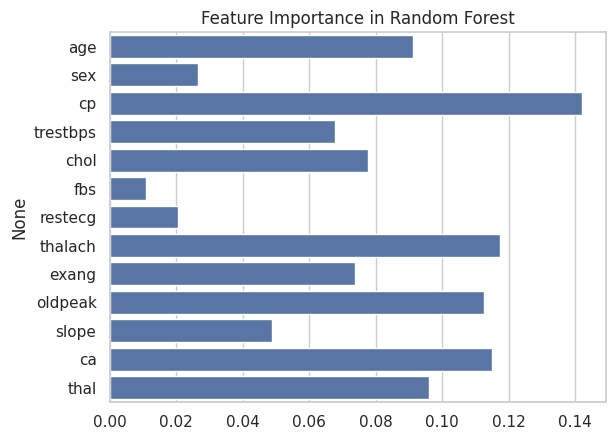

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = rf_model.feature_importances_
sns.barplot(x=feature_importances, y=X_train.columns)
plt.title("Feature Importance in Random Forest")
plt.show()


In [34]:
import joblib
joblib.dump(rf_model, "rf_model.pkl")


['rf_model.pkl']

In [35]:
import pickle

with open("best_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

print("Model saved!")


Model saved!
